In [145]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import thinkstats2
import thinkplot
import matplotlib
import pandas as pd

## Part 2

Cleaned columns i am going to use

In [128]:
df = pd.read_csv('Batting.csv')

In [129]:
seven = df.H[df.yearID == 2007].dropna()
eight = df.H[df.yearID == 2008].dropna()

In [4]:
print('Describe of 2007')
print(seven.describe())
print('-----------')
print('Describe of 2008')
print(eight.describe())

Describe of 2007
count    1385.000000
mean       32.474368
std        52.933821
min         0.000000
25%         0.000000
50%         3.000000
75%        43.000000
max       238.000000
Name: H, dtype: float64
-----------
Describe of 2008
count    1385.000000
mean       31.748736
std        50.889065
min         0.000000
25%         0.000000
50%         2.000000
75%        45.000000
max       213.000000
Name: H, dtype: float64


## Part 3

histograms, PMF and CDF

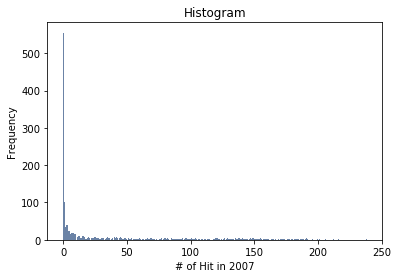

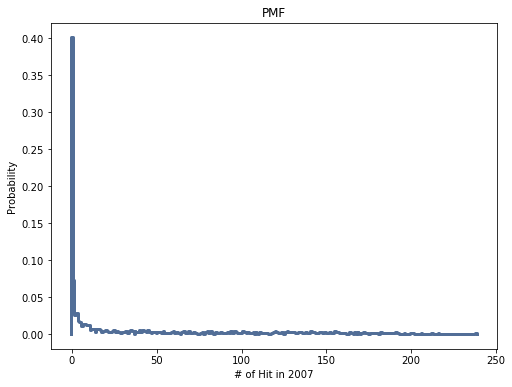

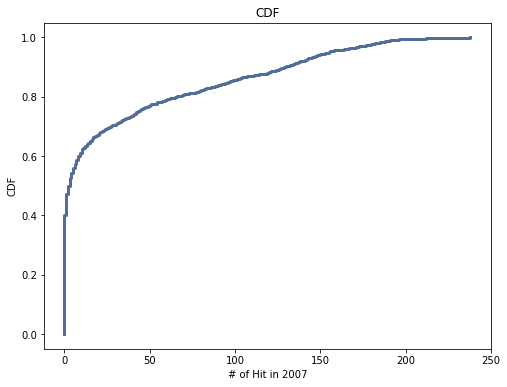

In [5]:
hist1 = thinkstats2.Hist(seven)
thinkplot.Hist(hist1)
thinkplot.Show(xlabel='# of Hit in 2007', ylabel='Frequency',title='Histogram')


pmf1 = thinkstats2.Pmf(seven)
thinkplot.Pmf(pmf1)
thinkplot.Show(xlabel='# of Hit in 2007', ylabel='Probability',title='PMF')


cdf1 = thinkstats2.Cdf(seven)
thinkplot.Cdf(cdf1)
thinkplot.Show(xlabel='# of Hit in 2007', ylabel='CDF', loc='upper left',title='CDF')

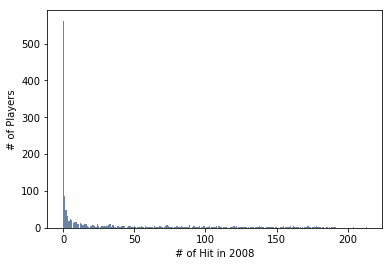

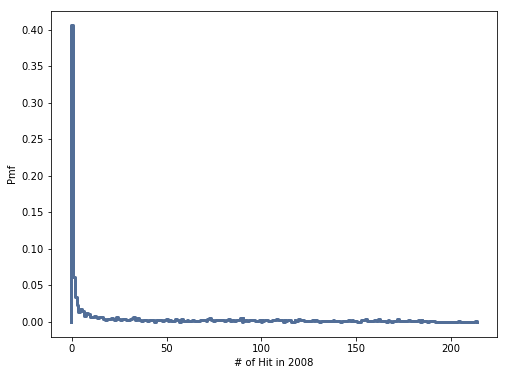

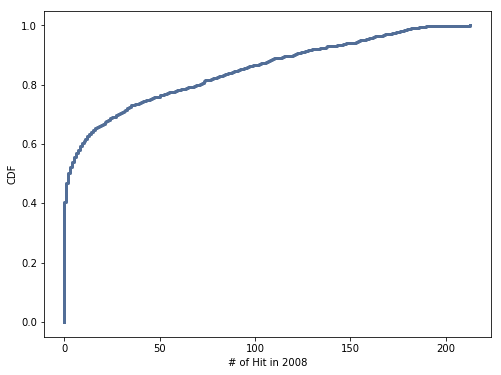

In [6]:
hist2 = thinkstats2.Hist(eight)
thinkplot.Hist(hist2)
thinkplot.Show(xlabel='# of Hit in 2008', ylabel='# of Players')


pmf2 = thinkstats2.Pmf(eight)
thinkplot.Pmf(pmf2)
thinkplot.Show(xlabel='# of Hit in 2008', ylabel='Pmf')


cdf2 = thinkstats2.Cdf(eight)
thinkplot.Cdf(cdf2)
thinkplot.Show(xlabel='# of Hit in 2008', ylabel='CDF', loc='upper left')

In [7]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank
PercentileRank(seven,50)

77.11191335740072

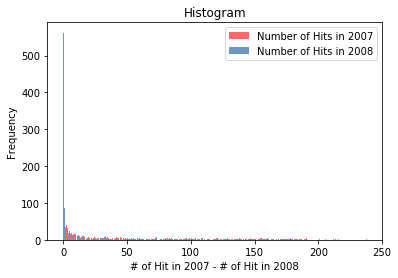

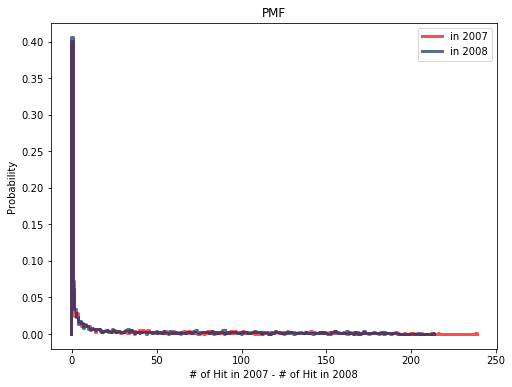

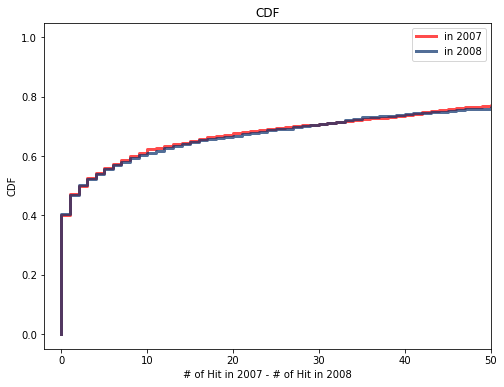

In [8]:
hist1 = thinkstats2.Hist(seven,label='Number of Hits in 2007')
hist2 = thinkstats2.Hist(eight,label='Number of Hits in 2008')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(hist1, align='right', width=width,color='red')
thinkplot.Hist(hist2, align='left', width=width)
thinkplot.Show(xlabel='# of Hit in 2007 - # of Hit in 2008', ylabel='Frequency',title='Histogram',loc='upper right')


pmf1 = thinkstats2.Pmf(seven,label='in 2007')
thinkplot.Pmf(pmf1,color='red')
pmf2 = thinkstats2.Pmf(eight,label='in 2008')
thinkplot.Pmf(pmf2)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Show(xlabel='# of Hit in 2007 - # of Hit in 2008', ylabel='Probability',title='PMF')


cdf1 = thinkstats2.Cdf(seven,label='in 2007')
thinkplot.Cdf(cdf1,color='red')
cdf2 = thinkstats2.Cdf(eight,label='in 2008')
thinkplot.Cdf(cdf2)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Show(xlabel='# of Hit in 2007 - # of Hit in 2008', ylabel='CDF',title='CDF',xlim=[-2,50])

## Part 4

Normal Probability Distribution

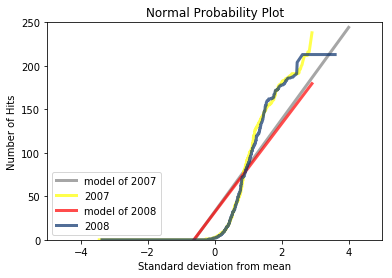

In [39]:
mean = seven.mean()
std = seven.std()
xs = [-4, 4]

thinkplot.PrePlot(4)
fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
thinkplot.Plot(fxs, fys, color='gray', label='model of 2007')

xs, ys = thinkstats2.NormalProbability(seven)
thinkplot.Plot(xs, ys, label="2007",color="yellow")

mean1 = eight.mean()
std1 = eight.std()
fxs, fys = thinkstats2.FitLine(xs, inter=mean1, slope=std1)
thinkplot.Plot(fxs, fys, color='red', label='model of 2008')

xs, ys = thinkstats2.NormalProbability(eight)
thinkplot.Plot(xs, ys, label='2008')
thinkplot.Config(xlabel='Standard deviation from mean', 
                 ylabel='Number of Hits',
                 title='Normal Probability Plot',
                 xlim=[-5,5],
                ylim=[0,250])


## Part 5

Relationship between the variables

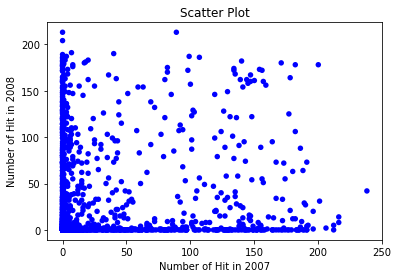

In [68]:
thinkplot.Scatter(seven, eight, alpha=1)
thinkplot.Config(xlabel='Number of Hit in 2007',
                 ylabel='Number of Hit in 2008',
                 title="Scatter Plot",
                 legend=False)

In [138]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
print('Covariance is', (Cov(seven,eight)))
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

print('Correlation is',Corr(seven,eight)*100)

Covariance is 146.261429707
Correlation is 5.43357644469


## Part 6

Hypothesis Test

In [143]:
class DiffMeansPermute(thinkstats2.HypothesisTest):
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat
    
    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [150]:
data = seven.values, eight.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.716

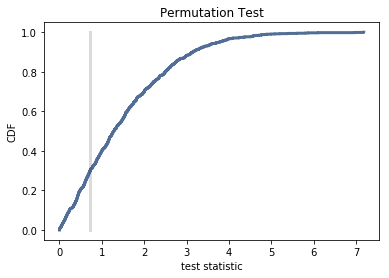

In [156]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF',
                title='Permutation Test')